<a href="https://colab.research.google.com/github/mudrab/mudrab/blob/main/DL_Practicals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Practical No.: 1(a)**
Aim: Implement numerical computation techniques in Python, focusing on
handling overflow and underflow.

In [ ]:
import numpy as np
import tensorflow as tf


In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
def handle_overflow_underflow():
 # Simulating Large and Small Numbers
 large_number = np.exp(1000) # This would cause an overflow
 small_number = np.exp(-1000) # This would cause an underflow
 print("Raw Computation:")
 print("Large Number (exp(1000)):", large_number)
 print("Small Number (exp(-1000)):", small_number)
 # Handling Overflow & Underflow using NumPy
 safe_large = np.exp(np.clip(1000, -700, 700))
 safe_small = np.exp(np.clip(-1000, -700, 700))
 print("\nSafe Computation:")
 print("Safe Large (exp(1000) clipped):", safe_large)
 print("Safe Small (exp(-1000) clipped):", safe_small)


In [ ]:
# Handling Overflow & Underflow using NumPy
safe_large = np.exp(np.clip(1000, -700, 700))
safe_small = np.exp(np.clip(-1000, -700, 700))
print("\nSafe Computation:")
print("Safe Large (exp(1000) clipped):", np.exp(np.clip(1000, -700, 700)))
print("Safe Small (exp(-1000) clipped):", safe_small)


Safe Computation:
Safe Large (exp(1000) clipped): 1.0142320547350045e+304
Safe Small (exp(-1000) clipped): 9.85967654375977e-305


In [ ]:
def log_sum_exp_trick():
 """ Numerically stable softmax computation """
 x = np.array([1000, 2000, 3000]) # Large numbers that cause overflow
 max_x = np.max(x)
 stable_x = x - max_x
 softmax = np.exp(stable_x) / np.sum(np.exp(stable_x))
 print("\nSoftmax with Log-Sum-Exp Trick:", softmax)

In [ ]:
def gradient_clipping():
 """ Demonstrate gradient clipping in TensorFlow """
 gradients = tf.constant([1.0, 10.0, 100.0, 1000.0])
 clipped_gradients = tf.clip_by_value(gradients, -5.0, 5.0)
 print("\nGradient Clipping:")
 print("Original Gradients:", gradients.numpy())
 print("Clipped Gradients:", clipped_gradients.numpy())

In [ ]:
if __name__ == "__main__":
 handle_overflow_underflow()
 log_sum_exp_trick()
 gradient_clipping()


Raw Computation:
Large Number (exp(1000)): inf
Small Number (exp(-1000)): 0.0

Safe Computation:
Safe Large (exp(1000) clipped): 1.0142320547350045e+304
Safe Small (exp(-1000) clipped): 9.85967654375977e-305

Softmax with Log-Sum-Exp Trick: [0. 0. 1.]

Gradient Clipping:
Original Gradients: [   1.   10.  100. 1000.]
Clipped Gradients: [1. 5. 5. 5.]


<ipython-input-3-aa4bb376c829>:3: RuntimeWarning: overflow encountered in exp
  large_number = np.exp(1000) # This would cause an overflow


In [ ]:
#full code
import numpy as np
import tensorflow as tf


def handle_overflow_underflow():
    # Simulating Large and Small Numbers
    large_number = np.exp(1000)  # This would cause an overflow
    small_number = np.exp(-1000)  # This would cause an underflow

    print("Raw Computation:")
    print("Large Number (exp(1000)):", large_number)
    print("Small Number (exp(-1000)):", small_number)

    # Handling Overflow & Underflow using NumPy
    safe_large = np.exp(np.clip(1000, -700, 700))
    safe_small = np.exp(np.clip(-1000, -700, 700))

    print("\nSafe Computation:")
    print("Safe Large (exp(1000) clipped):", safe_large)
    print("Safe Small (exp(-1000) clipped):", safe_small)


def log_sum_exp_trick():
    """ Numerically stable softmax computation """
    x = np.array([1000, 2000, 3000])  # Large numbers that cause overflow
    max_x = np.max(x)
    stable_x = x - max_x
    softmax = np.exp(stable_x) / np.sum(np.exp(stable_x))

    print("\nSoftmax with Log-Sum-Exp Trick:", softmax)


def gradient_clipping():
    """ Demonstrate gradient clipping in TensorFlow """
    gradients = tf.constant([1.0, 10.0, 100.0, 1000.0])
    clipped_gradients = tf.clip_by_value(gradients, -5.0, 5.0)

    print("\nGradient Clipping:")
    print("Original Gradients:", gradients.numpy())
    print("Clipped Gradients:", clipped_gradients.numpy())


if __name__ == "__main__":
    handle_overflow_underflow()
    log_sum_exp_trick()
    gradient_clipping()


Raw Computation:
Large Number (exp(1000)): inf
Small Number (exp(-1000)): 0.0

Safe Computation:
Safe Large (exp(1000) clipped): 1.0142320547350045e+304
Safe Small (exp(-1000) clipped): 9.85967654375977e-305

Softmax with Log-Sum-Exp Trick: [0. 0. 1.]

Gradient Clipping:
Original Gradients: [   1.   10.  100. 1000.]
Clipped Gradients: [1. 5. 5. 5.]


<ipython-input-8-d746ef30a8a2>:8: RuntimeWarning: overflow encountered in exp
  large_number = np.exp(1000)  # This would cause an overflow


**Practical no.: 1(b)**
Aim : Implement gradient-based optimization algorithms like gradient descent and stochastic gradient descent.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load MNIST dataset (handwritten digits)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Define a simple deep learning model
def create_model():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into a 1D array
        layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
        layers.Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
    ])
    return model


In [ ]:
# Compile and train using Batch Gradient Descent (GD)
model_gd = create_model()
model_gd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  # Batch GD with learning rate 0.01
                 loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
                 metrics=['accuracy'])  # Track accuracy during training

print("Training with Batch Gradient Descent...")
# Train using full batch (entire dataset at once)
history_gd = model_gd.fit(x_train, y_train, epochs=10, batch_size=60000, validation_data=(x_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with Batch Gradient Descent...
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0821 - loss: 2.4938 - val_accuracy: 0.0862 - val_loss: 2.4775
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 994ms/step - accuracy: 0.0850 - loss: 2.4781 - val_accuracy: 0.0897 - val_loss: 2.4620
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step - accuracy: 0.0874 - loss: 2.4629 - val_accuracy: 0.0932 - val_loss: 2.4471
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0901 - loss: 2.4483 - val_accuracy: 0.0972 - val_loss: 2.4326
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0930 - loss: 2.4340 - val_accuracy: 0.1012 - val_loss: 2.4185
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step - accuracy: 0.0962 - loss: 2.4202 - val_accuracy: 0.1034 - val_loss: 2.4048
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1003 - loss: 2.4068 - val_accuracy: 0.1082 - val_loss: 2.3915
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1039 - loss: 2.3938 - val_acc

In [ ]:
# Compile and train using Stochastic Gradient Descent (SGD)
model_sgd = create_model()
model_sgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  # Stochastic GD with learning rate 0.01
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

print("Training with Stochastic Gradient Descent...")
# Train using stochastic updates (one sample at a time)
history_sgd = model_sgd.fit(x_train, y_train, epochs=10, batch_size=1, validation_data=(x_test, y_test))


Training with Stochastic Gradient Descent...
Epoch 1/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 135s 2ms/step - accuracy: 0.8953 - loss: 0.3477 - val_accuracy: 0.9593 - val_loss: 0.1279
Epoch 2/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 133s 2ms/step - accuracy: 0.9693 - loss: 0.1017 - val_accuracy: 0.9688 - val_loss: 0.0964
Epoch 3/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 148s 2ms/step - accuracy: 0.9780 - loss: 0.0717 - val_accuracy: 0.9723 - val_loss: 0.0881
Epoch 4/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 126s 2ms/step - accuracy: 0.9828 - loss: 0.0536 - val_accuracy: 0.9756 - val_loss: 0.0773
Epoch 5/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 147s 2ms/step - accuracy: 0.9871 - loss: 0.0382 - val_accuracy: 0.9750 - val_loss: 0.0757
Epoch 6/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 137s 2ms/step - accuracy: 0.9898 - loss: 0.0320 - val_accuracy: 0.9780 - val_loss: 0.0740
Epoch 7/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 141s 2ms/step - accuracy: 0.9918 - loss: 0.0251 - val_accuracy: 0.9790 - val_loss: 0.0746
Epoch 8/10
60000/

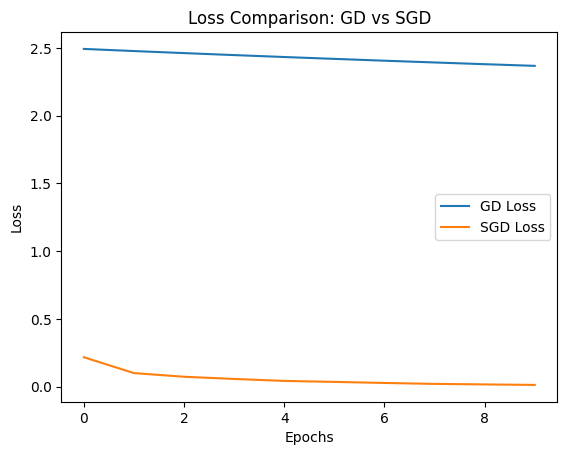

In [ ]:
# Plot training loss for both methods
plt.plot(history_gd.history['loss'], label='GD Loss')  # Loss curve for Batch GD
plt.plot(history_sgd.history['loss'], label='SGD Loss')  # Loss curve for SGD
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison: GD vs SGD')
plt.legend()
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with Batch Gradient Descent...
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0984 - loss: 2.3355 - val_accuracy: 0.1087 - val_loss: 2.3168
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1038 - loss: 2.3250 - val_accuracy: 0.1151 - val_loss: 2.3063
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step - accuracy: 0.1094 - loss: 2.3147 - val_accuracy: 0.1213 - val_loss: 2.2959
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step - accuracy: 0.1154 - loss: 2.3044 - val_accuracy: 0.1272 - val_loss: 2.2857
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step - accuracy: 0.1216 - loss: 2.2943 - val_accuracy: 0.1339 - val_loss: 2.2755
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1278 - loss: 2.2843 - val_accuracy: 0.1414 - val_loss: 2.2655
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step - accuracy: 0.1350 - loss: 2.2744 - val_accuracy: 0.1495 - val_loss: 2.2556
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1425 - loss: 2.2646 - val_

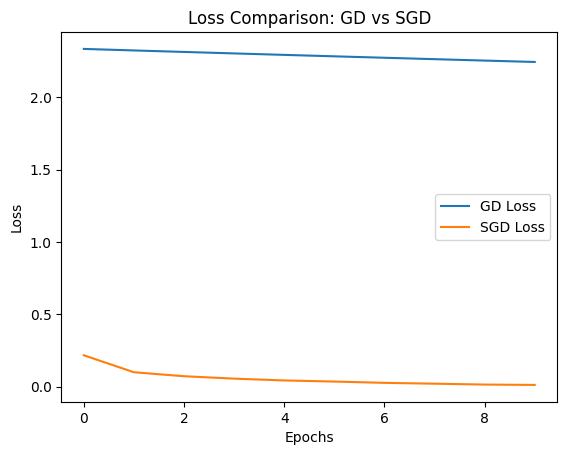

In [ ]:
# full code
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

# Define a simple deep learning model
def create_model():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile and train using Batch Gradient Descent (GD)
model_gd = create_model()
model_gd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

print("Training with Batch Gradient Descent...")
history_gd = model_gd.fit(x_train, y_train, epochs=10, batch_size=60000, validation_data=(x_test, y_test))

# Compile and train using Stochastic Gradient Descent (SGD)
model_sgd = create_model()
model_sgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

print("Training with Stochastic Gradient Descent...")
history_sgd = model_sgd.fit(x_train, y_train, epochs=10, batch_size=1, validation_data=(x_test, y_test))

# Plot training loss for both methods
plt.plot(history_gd.history['loss'], label='GD Loss')
plt.plot(history_sgd.history['loss'], label='SGD Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Comparison: GD vs SGD')
plt.legend()
plt.show()


**Practical no.: 1(c)**
Aim : Implement constrained optimization algorithms and apply them to example linear least square.


In [ ]:
import numpy as np
from scipy.optimize import minimize

def objective_function(x, A, b):
    """Linear Least Squares Objective Function: ||Ax - b||^2"""
    return np.linalg.norm(A @ x - b) ** 2

# Example problem setup
np.random.seed(42)
A = np.random.rand(5, 3)  # 5 equations, 3 unknowns
b = np.random.rand(5)

# Initial guess (random start)
x0 = np.random.rand(3)

# Constraints: x >= 0 (Non-negativity constraint)
constraints = ({'type': 'ineq', 'fun': lambda x: x})

# Perform Constrained Optimization
result = minimize(objective_function, x0, args=(A, b), method='SLSQP', constraints=constraints)

# Output the results
print("Optimized x:", result.x)
print("Objective function value:", result.fun)
print("Success status:", result.success)
print("Message:", result.message)


Optimized x: [0.24725794 0.14658039 0.24894753]
Objective function value: 0.11708602983381579
Success status: True
Message: Optimization terminated successfully


**PRACTICAL 2**

**Practical no.: 2(b)** Aim : Solve the XOR problem using a deep feedforward network and implement gradient-based learning.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


In [ ]:
# Define the XOR dataset
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)



In [ ]:
# Define the feedforward neural network
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.hidden = nn.Linear(2, 4)  # Hidden layer with 4 neurons
        self.output = nn.Linear(4, 1)  # Output layer

    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))  # Activation function
        x = torch.sigmoid(self.output(x))  # Activation function
        return x

# Initialize the model
model = XORNet()


In [ ]:
# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.1)  # Adam optimizer



In [ ]:
# Training loop
epochs = 5000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')



Epoch [0/5000], Loss: 0.6936
Epoch [500/5000], Loss: 0.0007
Epoch [1000/5000], Loss: 0.0002
Epoch [1500/5000], Loss: 0.0001
Epoch [2000/5000], Loss: 0.0001
Epoch [2500/5000], Loss: 0.0000
Epoch [3000/5000], Loss: 0.0000
Epoch [3500/5000], Loss: 0.0000
Epoch [4000/5000], Loss: 0.0000
Epoch [4500/5000], Loss: 0.0000


In [ ]:
# Test the model
with torch.no_grad():
    predictions = model(X)
    predicted_labels = (predictions > 0.5).float()
    print("\nPredictions:\n", predicted_labels)




Predictions:
 tensor([[0.],
        [1.],
        [1.],
        [0.]])


In [ ]:
# full code
import torch
import torch.nn as nn
import torch.optim as optim

# Define the XOR dataset
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Define the feedforward neural network
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.hidden = nn.Linear(2, 4)  # Hidden layer with 4 neurons
        self.output = nn.Linear(4, 1)  # Output layer

    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))  # Activation function
        x = torch.sigmoid(self.output(x))  # Activation function
        return x

# Initialize the model
model = XORNet()

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.1)  # Adam optimizer

# Training loop
epochs = 5000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')

# Test the model
with torch.no_grad():
    predictions = model(X)
    predicted_labels = (predictions > 0.5).float()
    print("\nPredictions:\n", predicted_labels)


Epoch [0/5000], Loss: 0.6936
Epoch [500/5000], Loss: 0.0014
Epoch [1000/5000], Loss: 0.0005
Epoch [1500/5000], Loss: 0.0002
Epoch [2000/5000], Loss: 0.0001
Epoch [2500/5000], Loss: 0.0001
Epoch [3000/5000], Loss: 0.0001
Epoch [3500/5000], Loss: 0.0000
Epoch [4000/5000], Loss: 0.0000
Epoch [4500/5000], Loss: 0.0000

Predictions:
 tensor([[0.],
        [1.],
        [1.],
        [0.]])


**PRACTICAL 3**

**Practical no.- 3(a)**
Aim: Implement L1 and L2 norm penalties for regularization.


In [ ]:
# Import necessary libraries
import tensorflow as tf  # TensorFlow for deep learning
from tensorflow.keras import layers, regularizers  # Layers and regularizers for building the neural network
from sklearn.datasets import load_iris  # Load the Iris dataset
from sklearn.model_selection import train_test_split  # Split dataset into training and testing sets
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # Preprocessing utilities
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization of training progress


In [ ]:
# Load the Iris dataset (contains 150 samples with 4 features each)
iris = load_iris()
X = iris.data  # Extract feature matrix (4 features: sepal length, sepal width, petal length, petal width)
y = iris.target.reshape(-1, 1)  # Extract target labels and reshape to column vector


In [ ]:
# One-hot encode the target labels (convert categorical labels to binary vectors)
encoder = OneHotEncoder(sparse_output=False)  # Prevent deprecation warning by using sparse_output=False
y = encoder.fit_transform(y)  # Convert labels to one-hot encoding (3 classes → [1,0,0], [0,1,0], [0,0,1])


In [ ]:
# Standardize the feature values (zero mean, unit variance) to improve model performance
scaler = StandardScaler()  # Initialize the StandardScaler
X = scaler.fit_transform(X)  # Apply standardization to feature values


In [ ]:
# Split dataset into training (80%) and testing (20%) subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Define the neural network model using a sequential architecture
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu',  # First hidden layer with 64 neurons and ReLU activation
                 kernel_regularizer=regularizers.l1(0.01)),  # L1 regularization to prevent overfitting
    layers.Dense(64, activation='relu',  # Second hidden layer with 64 neurons and ReLU activation
                 kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization for weight decay
    layers.Dense(3, activation='softmax')  # Output layer with 3 neurons (one for each class) using softmax activation
])



In [ ]:
# Compile the model by specifying optimizer, loss function, and evaluation metric
model.compile(optimizer='adam',  # Adam optimizer for adaptive learning rate
              loss='categorical_crossentropy',  # Cross-entropy loss for multi-class classification
              metrics=['accuracy'])  # Track accuracy during training



In [ ]:
# Train the model and store training history for later visualization
history = model.fit(
    X_train, y_train,  # Training dataset (features and labels)
    epochs=50,  # Train for 50 epochs (full dataset passes)
    batch_size=8,  # Train in small batches of 8 samples
    validation_data=(X_test, y_test),  # Use test data for validation after each epoch
    verbose=1  # Show progress output during training
)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.5054 - loss: 2.0113 - val_accuracy: 0.7000 - val_loss: 1.6904
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7110 - loss: 1.6487 - val_accuracy: 0.8333 - val_loss: 1.4298
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7377 - loss: 1.5093 - val_accuracy: 0.8667 - val_loss: 1.2648
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8557 - loss: 1.2736 - val_accuracy: 0.8667 - val_loss: 1.1487
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8474 - loss: 1.1296 - val_accuracy: 0.9000 - val_loss: 1.0519
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7685 - loss: 1.1847 - val_accuracy: 0.9333 - val_loss: 0.9733
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8733 - loss: 0.9998 - val_accuracy: 0.9333 - val_loss: 0.9005
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8784 - loss: 0.9465 - val_accuracy: 0.9667 - va

In [ ]:
# Plot the training and validation loss & accuracy over epochs
plt.figure(figsize=(12, 5))  # Set figure size for better readability


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

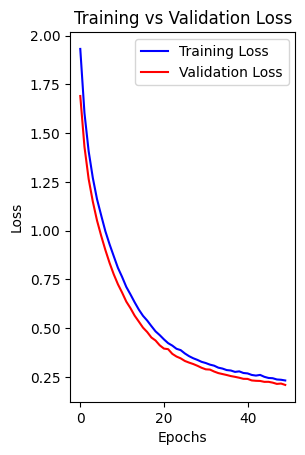

In [ ]:
# Plot Loss Curve
plt.subplot(1, 2, 1)  # Create subplot for loss
plt.plot(history.history['loss'], label='Training Loss', color='blue')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')  # Plot validation loss
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.title('Training vs Validation Loss')  # Title of the plot
plt.legend()  # Show legend to distinguish training vs validation loss


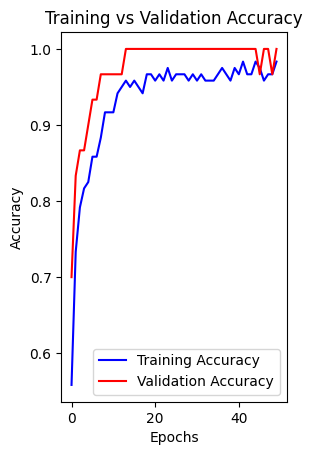

In [ ]:
# Plot Accuracy Curve
plt.subplot(1, 2, 2)  # Create subplot for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')  # Plot validation accuracy
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.title('Training vs Validation Accuracy')  # Title of the plot
plt.legend()  # Show legend for accuracy curves

plt.show()  # Display the plots


In [ ]:
# Evaluate model on test data to check final performance
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)  # Evaluate the trained model on test set
print(f"Test Accuracy: {accuracy * 100:.2f}%")  # Print test accuracy percentage



Test Accuracy: 100.00%


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4754 - loss: 2.1063 - val_accuracy: 0.6667 - val_loss: 1.8347
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7887 - loss: 1.7464 - val_accuracy: 0.8000 - val_loss: 1.5641
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7543 - loss: 1.5964 - val_accuracy: 0.8667 - val_loss: 1.3679
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8185 - loss: 1.4011 - val_accuracy: 0.9000 - val_loss: 1.2161
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7979 - loss: 1.2580 - val_accuracy: 0.9000 - val_loss: 1.1001
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8876 - loss: 1.0822 - val_accuracy: 0.9000 - val_loss: 1.0061
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8557 - loss: 1.0387 - val_accuracy: 0.9333 - val_loss: 0.9249
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8654 - loss: 0.9942 - val_accuracy: 0.9333 - val_lo

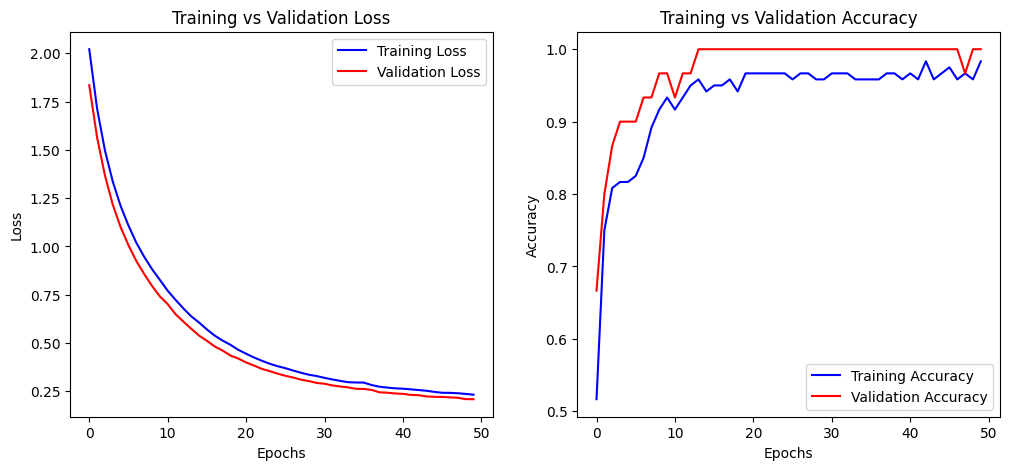

Test Accuracy: 100.00%


In [ ]:
# full code
# Import necessary libraries
import tensorflow as tf  # TensorFlow for deep learning
from tensorflow.keras import layers, regularizers  # Layers and regularizers for building the neural network
from sklearn.datasets import load_iris  # Load the Iris dataset
from sklearn.model_selection import train_test_split  # Split dataset into training and testing sets
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # Preprocessing utilities
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization of training progress

# Load the Iris dataset (contains 150 samples with 4 features each)
iris = load_iris()
X = iris.data  # Extract feature matrix (4 features: sepal length, sepal width, petal length, petal width)
y = iris.target.reshape(-1, 1)  # Extract target labels and reshape to column vector

# One-hot encode the target labels (convert categorical labels to binary vectors)
encoder = OneHotEncoder(sparse_output=False)  # Prevent deprecation warning by using sparse_output=False
y = encoder.fit_transform(y)  # Convert labels to one-hot encoding (3 classes → [1,0,0], [0,1,0], [0,0,1])

# Standardize the feature values (zero mean, unit variance) to improve model performance
scaler = StandardScaler()  # Initialize the StandardScaler
X = scaler.fit_transform(X)  # Apply standardization to feature values

# Split dataset into training (80%) and testing (20%) subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model using a sequential architecture
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu',  # First hidden layer with 64 neurons and ReLU activation
                 kernel_regularizer=regularizers.l1(0.01)),  # L1 regularization to prevent overfitting
    layers.Dense(64, activation='relu',  # Second hidden layer with 64 neurons and ReLU activation
                 kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization for weight decay
    layers.Dense(3, activation='softmax')  # Output layer with 3 neurons (one for each class) using softmax activation
])

# Compile the model by specifying optimizer, loss function, and evaluation metric
model.compile(optimizer='adam',  # Adam optimizer for adaptive learning rate
              loss='categorical_crossentropy',  # Cross-entropy loss for multi-class classification
              metrics=['accuracy'])  # Track accuracy during training

# Train the model and store training history for later visualization
history = model.fit(
    X_train, y_train,  # Training dataset (features and labels)
    epochs=50,  # Train for 50 epochs (full dataset passes)
    batch_size=8,  # Train in small batches of 8 samples
    validation_data=(X_test, y_test),  # Use test data for validation after each epoch
    verbose=1  # Show progress output during training
)

# Plot the training and validation loss & accuracy over epochs
plt.figure(figsize=(12, 5))  # Set figure size for better readability

# Plot Loss Curve
plt.subplot(1, 2, 1)  # Create subplot for loss
plt.plot(history.history['loss'], label='Training Loss', color='blue')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')  # Plot validation loss
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.title('Training vs Validation Loss')  # Title of the plot
plt.legend()  # Show legend to distinguish training vs validation loss

# Plot Accuracy Curve
plt.subplot(1, 2, 2)  # Create subplot for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')  # Plot validation accuracy
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.title('Training vs Validation Accuracy')  # Title of the plot
plt.legend()  # Show legend for accuracy curves

plt.show()  # Display the plots

# Evaluate model on test data to check final performance
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)  # Evaluate the trained model on test set
print(f"Test Accuracy: {accuracy * 100:.2f}%")  # Print test accuracy percentage


**Practical no.- 3(b)**
Aim: Write a python program to Implement dropout regularization and evaluate its effectiveness for deep learning


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load the MNIST dataset (handwritten digits 0-9)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()




11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize the data (scale pixel values to range 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Define the model with dropout to prevent overfitting
model_with_dropout = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten input images (28x28) into a 1D array
    layers.Dense(512, activation='relu'),  # First fully connected layer with 512 neurons and ReLU activation
    layers.Dropout(0.5),  # Dropout layer with 50% dropout rate to reduce overfitting
    layers.Dense(256, activation='relu'),  # Second fully connected layer with 256 neurons
    layers.Dropout(0.5),  # Another dropout layer
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit class)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model (use Adam optimizer and sparse categorical cross-entropy loss)
model_with_dropout.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])



In [ ]:
# Train the model with dropout for 10 epochs
history_with_dropout = model_with_dropout.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8297 - loss: 0.5345 - val_accuracy: 0.9644 - val_loss: 0.1165
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9464 - loss: 0.1809 - val_accuracy: 0.9716 - val_loss: 0.0946
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9576 - loss: 0.1427 - val_accuracy: 0.9710 - val_loss: 0.0947
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9618 - loss: 0.1301 - val_accuracy: 0.9719 - val_loss: 0.0943
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.9651 - loss: 0.1183 - val_accuracy: 0.9778 - val_loss: 0.0759
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9683 - loss: 0.1071 - val_accuracy: 0.9775 - val_loss: 0.0748
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.9678 - loss: 0.1065 - val_accuracy: 0.9782 - val_loss: 0.0721
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9722 -

In [ ]:
# Define the model without dropout (for comparison)
model_without_dropout = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten input images
    layers.Dense(512, activation='relu'),  # First dense layer
    layers.Dense(256, activation='relu'),  # Second dense layer
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons
])


In [ ]:
# Compile the model (same settings as before)
model_without_dropout.compile(optimizer='adam',
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])


In [ ]:
# Train the model without dropout for 10 epochs
history_without_dropout = model_without_dropout.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9043 - loss: 0.3180 - val_accuracy: 0.9722 - val_loss: 0.0969
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9738 - loss: 0.0825 - val_accuracy: 0.9751 - val_loss: 0.0774
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9823 - loss: 0.0533 - val_accuracy: 0.9695 - val_loss: 0.1050
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9875 - loss: 0.0400 - val_accuracy: 0.9803 - val_loss: 0.0667
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9908 - loss: 0.0292 - val_accuracy: 0.9798 - val_loss: 0.0769
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9924 - loss: 0.0235 - val_accuracy: 0.9805 - val_loss: 0.0733
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9933 - loss: 0.0203 - val_accuracy: 0.9795 - val_loss: 0.0810
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9942 -

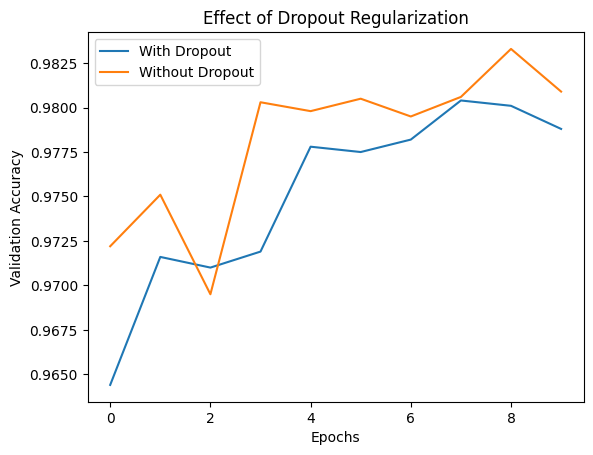

In [ ]:
# Plot the validation accuracy for both models to compare performance
plt.plot(history_with_dropout.history['val_accuracy'], label='With Dropout')
plt.plot(history_without_dropout.history['val_accuracy'], label='Without Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Effect of Dropout Regularization')
plt.show()


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8322 - loss: 0.5338 - val_accuracy: 0.9626 - val_loss: 0.1205
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9456 - loss: 0.1816 - val_accuracy: 0.9686 - val_loss: 0.1001
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9539 - loss: 0.1516 - val_accuracy: 0.9713 - val_loss: 0.0975
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9618 - loss: 0.1267 - val_accuracy: 0.9748 - val_loss: 0.0814
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.9645 - loss: 0.1176 - val_accuracy: 0.9766 - val_loss: 0.0763
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.9669 - loss: 0.1103 - val_accuracy: 0.9791 - val_loss: 0.0724
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.9695 - loss: 0.1010 - val_accuracy: 0.9793 - val_loss: 0.0683
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9704 -

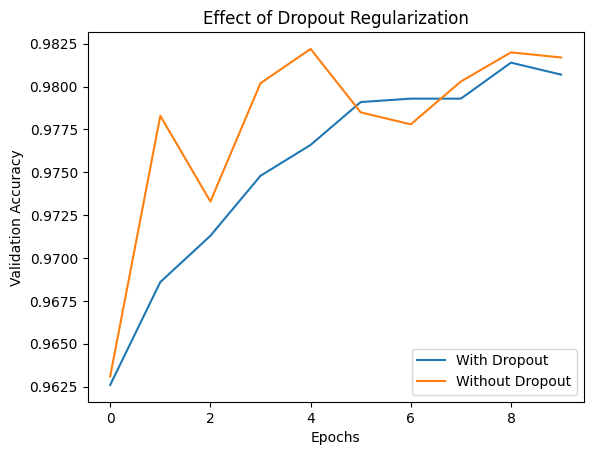

In [ ]:
# full code
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset (handwritten digits 0-9)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the data (scale pixel values to range 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model with dropout to prevent overfitting
model_with_dropout = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten input images (28x28) into a 1D array
    layers.Dense(512, activation='relu'),  # First fully connected layer with 512 neurons and ReLU activation
    layers.Dropout(0.5),  # Dropout layer with 50% dropout rate to reduce overfitting
    layers.Dense(256, activation='relu'),  # Second fully connected layer with 256 neurons
    layers.Dropout(0.5),  # Another dropout layer
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit class)
])

# Compile the model (use Adam optimizer and sparse categorical cross-entropy loss)
model_with_dropout.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# Train the model with dropout for 10 epochs
history_with_dropout = model_with_dropout.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Define the model without dropout (for comparison)
model_without_dropout = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten input images
    layers.Dense(512, activation='relu'),  # First dense layer
    layers.Dense(256, activation='relu'),  # Second dense layer
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons
])

# Compile the model (same settings as before)
model_without_dropout.compile(optimizer='adam',
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])

# Train the model without dropout for 10 epochs
history_without_dropout = model_without_dropout.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot the validation accuracy for both models to compare performance
plt.plot(history_with_dropout.history['val_accuracy'], label='With Dropout')
plt.plot(history_without_dropout.history['val_accuracy'], label='Without Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Effect of Dropout Regularization')
plt.show()



**Practical no. – 3(c)**
Aim : Explore semi-supervised learning techniques and implement early stopping.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import accuracy_score



In [ ]:
def early_stopping(prev_acc, curr_acc, patience, count):
    if curr_acc <= prev_acc:
        count += 1
    else:
        count = 0
    return count >= patience, count


In [ ]:
# Load dataset
digits = load_digits()
X, y = digits.data, digits.target


In [ ]:
# Create a semi-supervised scenario by randomly removing labels
rng = np.random.RandomState(42)
unlabeled_mask = rng.rand(len(y)) < 0.7  # 70% labels removed
y_semi = np.copy(y)
y_semi[unlabeled_mask] = -1  # Mark as unlabeled


In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Initialize Label Spreading model
label_spread = LabelSpreading(kernel='knn', n_neighbors=7, alpha=0.2)
label_spread.fit(X_train, y_train)


LabelSpreading(kernel='knn')

In [ ]:
# Implement early stopping
patience = 3
prev_acc = 0.0
count = 0

for epoch in range(10):  # Max iterations
    label_spread.fit(X_train, y_train)
    y_pred = label_spread.predict(X_test)
    curr_acc = accuracy_score(y_test, y_pred)
    print(f"Epoch {epoch + 1}, Accuracy: {curr_acc:.4f}")

    stop, count = early_stopping(prev_acc, curr_acc, patience, count)
    if stop:
        print("Early stopping triggered!")
        break
    prev_acc = curr_acc


Epoch 1, Accuracy: 0.9907
Epoch 2, Accuracy: 0.9907
Epoch 3, Accuracy: 0.9907
Epoch 4, Accuracy: 0.9907
Early stopping triggered!


In [ ]:
# Final accuracy
y_final_pred = label_spread.predict(X_test)
final_acc = accuracy_score(y_test, y_final_pred)
print(f"Final Accuracy: {final_acc:.4f}")


Final Accuracy: 0.9907


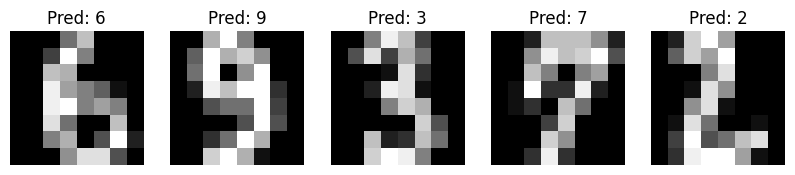

In [ ]:
# Plot some labeled vs predicted results
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Pred: {y_final_pred[i]}")
    ax.axis('off')
plt.show()


Epoch 1, Accuracy: 0.9907
Epoch 2, Accuracy: 0.9907
Epoch 3, Accuracy: 0.9907
Epoch 4, Accuracy: 0.9907
Early stopping triggered!
Final Accuracy: 0.9907


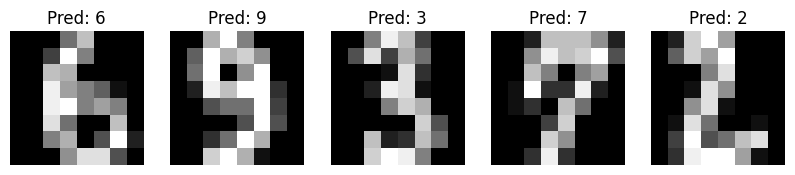

In [ ]:
#full code
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import accuracy_score


def early_stopping(prev_acc, curr_acc, patience, count):
    if curr_acc <= prev_acc:
        count += 1
    else:
        count = 0
    return count >= patience, count


# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Create a semi-supervised scenario by randomly removing labels
rng = np.random.RandomState(42)
unlabeled_mask = rng.rand(len(y)) < 0.7  # 70% labels removed
y_semi = np.copy(y)
y_semi[unlabeled_mask] = -1  # Mark as unlabeled

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Label Spreading model
label_spread = LabelSpreading(kernel='knn', n_neighbors=7, alpha=0.2)
label_spread.fit(X_train, y_train)

# Implement early stopping
patience = 3
prev_acc = 0.0
count = 0

for epoch in range(10):  # Max iterations
    label_spread.fit(X_train, y_train)
    y_pred = label_spread.predict(X_test)
    curr_acc = accuracy_score(y_test, y_pred)
    print(f"Epoch {epoch + 1}, Accuracy: {curr_acc:.4f}")

    stop, count = early_stopping(prev_acc, curr_acc, patience, count)
    if stop:
        print("Early stopping triggered!")
        break
    prev_acc = curr_acc

# Final accuracy
y_final_pred = label_spread.predict(X_test)
final_acc = accuracy_score(y_test, y_final_pred)
print(f"Final Accuracy: {final_acc:.4f}")

# Plot some labeled vs predicted results
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Pred: {y_final_pred[i]}")
    ax.axis('off')
plt.show()


**Practical no. – 3(d)**
Aim: Explore techniques for dataset augmentation and noise robustness.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.8426 - loss: 0.4997 - val_accuracy: 0.9871 - val_loss: 0.0379
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 41ms/step - accuracy: 0.9690 - loss: 0.0992 - val_accuracy: 0.9837 - val_loss: 0.0545
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.9785 - loss: 0.0687 - val_accuracy: 0.9879 - val_loss: 0.0343
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9818 - loss: 0.0567 - val_accuracy: 0.9918 - val_loss: 0.0244
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 41ms/step - accuracy: 0.9853 - loss: 0.0475 - val_accuracy: 0.9921 - val_loss: 0.0243
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9812 - loss: 0.0629
Accuracy on Noisy Data: 0.9849


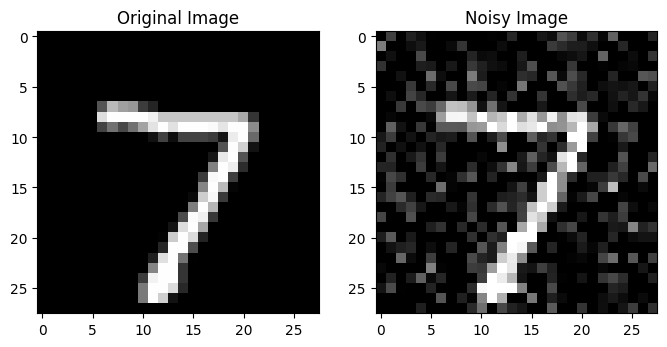

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the MNIST dataset (handwritten digits)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Expand dimensions to match CNN input shape (28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Define Data Augmentation techniques
aug_datagen = ImageDataGenerator(
    rotation_range=10,  # Rotate images by up to 10 degrees
    width_shift_range=0.1,  # Shift images horizontally by 10%
    height_shift_range=0.1,  # Shift images vertically by 10%
    zoom_range=0.1,  # Zoom in/out by 10%
    shear_range=0.1  # Apply shearing transformations
)

# Function to add Gaussian noise to images
def add_noise(images, noise_factor=0.2):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)  # Ensure values stay in [0,1] range
    return noisy_images

# Create noisy training and testing datasets
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# Build a Convolutional Neural Network (CNN) model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    MaxPooling2D((2, 2)),  # Reduce spatial dimensions
    Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    MaxPooling2D((2, 2)),  # Reduce spatial dimensions further
    Flatten(),  # Flatten the feature maps into a 1D vector
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one per class)
])

# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using augmented data
model.fit(aug_datagen.flow(x_train, y_train, batch_size=32), epochs=5, validation_data=(x_test, y_test))

# Evaluate model performance on noisy test images
test_loss, test_acc = model.evaluate(x_test_noisy, y_test)
print(f'Accuracy on Noisy Data: {test_acc:.4f}')

# Display an example of an original image vs a noisy image
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(x_test[0].squeeze(), cmap='gray')  # Show original image
axes[0].set_title("Original Image")
axes[1].imshow(x_test_noisy[0].squeeze(), cmap='gray')  # Show noisy image
axes[1].set_title("Noisy Image")
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [ ]:
# Load the MNIST dataset (handwritten digits)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


In [ ]:
# Expand dimensions to match CNN input shape (28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


In [ ]:
# Define Data Augmentation techniques
aug_datagen = ImageDataGenerator(
    rotation_range=10,  # Rotate images by up to 10 degrees
    width_shift_range=0.1,  # Shift images horizontally by 10%
    height_shift_range=0.1,  # Shift images vertically by 10%
    zoom_range=0.1,  # Zoom in/out by 10%
    shear_range=0.1  # Apply shearing transformations
)

In [ ]:
# Function to add Gaussian noise to images
def add_noise(images, noise_factor=0.2):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)  # Ensure values stay in [0,1] range
    return noisy_images


In [ ]:
# Create noisy training and testing datasets
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)


In [ ]:
# Build a Convolutional Neural Network (CNN) model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    MaxPooling2D((2, 2)),  # Reduce spatial dimensions
    Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    MaxPooling2D((2, 2)),  # Reduce spatial dimensions further
    Flatten(),  # Flatten the feature maps into a 1D vector
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one per class)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model using augmented data
model.fit(aug_datagen.flow(x_train, y_train, batch_size=32), epochs=5, validation_data=(x_test, y_test))


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 40ms/step - accuracy: 0.8415 - loss: 0.5029 - val_accuracy: 0.9834 - val_loss: 0.0518
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9698 - loss: 0.0967 - val_accuracy: 0.9897 - val_loss: 0.0303
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 104s 56ms/step - accuracy: 0.9784 - loss: 0.0689 - val_accuracy: 0.9898 - val_loss: 0.0322
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.9828 - loss: 0.0562 - val_accuracy: 0.9892 - val_loss: 0.0334
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9850 - loss: 0.0509 - val_accuracy: 0.9925 - val_loss: 0.0247


In [ ]:
# Evaluate model performance on noisy test images
test_loss, test_acc = model.evaluate(x_test_noisy, y_test)
print(f'Accuracy on Noisy Data: {test_acc:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9677 - loss: 0.1037
Accuracy on Noisy Data: 0.9747


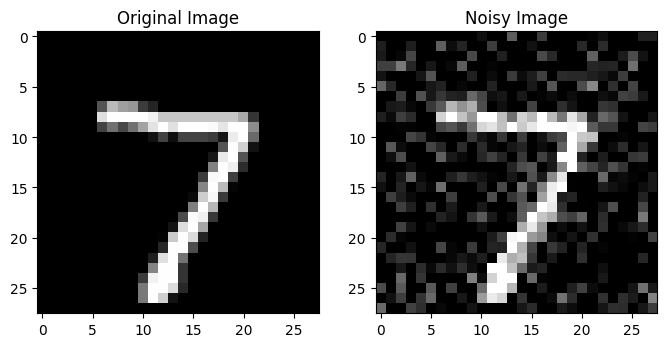

In [ ]:
# Display an example of an original image vs a noisy image
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(x_test[0].squeeze(), cmap='gray')  # Show original image
axes[0].set_title("Original Image")
axes[1].imshow(x_test_noisy[0].squeeze(), cmap='gray')  # Show noisy image
axes[1].set_title("Noisy Image")
plt.show()


**Practical No.- 4**

Aim: 4A. Implement basic optimization algorithms like gradient descent and momentum.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Function to minimize: f(x) = x2
# Gradient: f'(x) = 2x
def function(x):
    return x ** 2


def gradient(x):
    return 2 * x


In [ ]:
# Gradient Descent Algorithm
def gradient_descent(learning_rate=0.1, iterations=50):
    x = 5  # Starting point
    history = [x]

    for _ in range(iterations):
        x -= learning_rate * gradient(x)
        history.append(x)

    return history


In [ ]:
# Momentum-based Gradient Descent Algorithm
def momentum_gradient_descent(learning_rate=0.1, momentum=0.9, iterations=50):
    x = 5  # Starting point
    velocity = 0
    history = [x]

    for _ in range(iterations):
        velocity = momentum * velocity - learning_rate * gradient(x)
        x += velocity
        history.append(x)

    return history



In [ ]:
# Momentum-based Gradient Descent Algorithm
def momentum_gradient_descent(learning_rate=0.1, momentum=0.9, iterations=50):
    x = 5  # Starting point
    velocity = 0
    history = [x]

    for _ in range(iterations):
        velocity = momentum * velocity - learning_rate * gradient(x)
        x += velocity
        history.append(x)

    return history


In [ ]:
# Run optimizers
gd_history = gradient_descent()
mgd_history = momentum_gradient_descent()



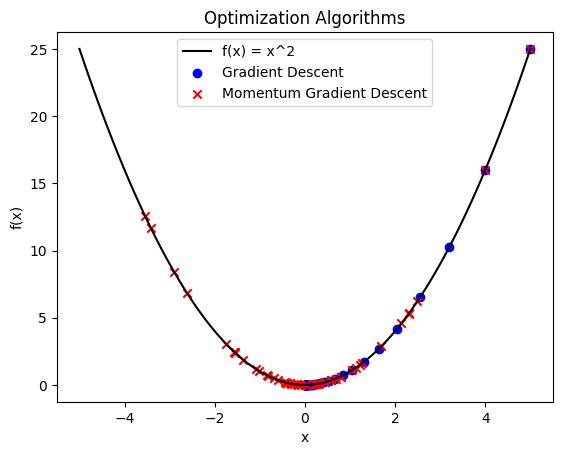

In [ ]:
# Plot results
x_vals = np.linspace(-5, 5, 100)
y_vals = function(x_vals)
plt.plot(x_vals, y_vals, label='f(x) = x^2', color='black')
plt.scatter(gd_history, [function(x) for x in gd_history], label='Gradient Descent', color='blue', marker='o')
plt.scatter(mgd_history, [function(x) for x in mgd_history], label='Momentum Gradient Descent', color='red', marker='x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Optimization Algorithms')
plt.show()


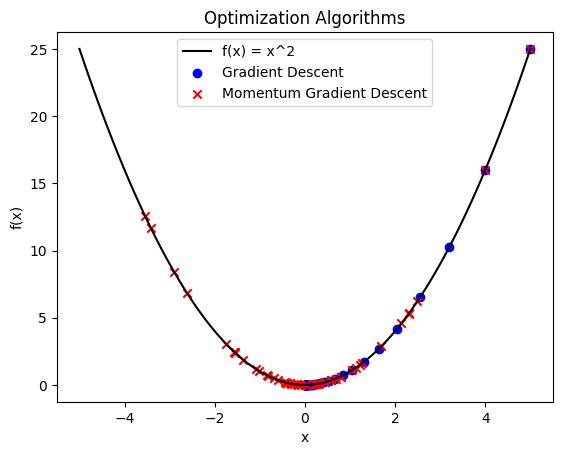

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Function to minimize: f(x) = x2
# Gradient: f'(x) = 2x
def function(x):
    return x ** 2


def gradient(x):
    return 2 * x


# Gradient Descent Algorithm
def gradient_descent(learning_rate=0.1, iterations=50):
    x = 5  # Starting point
    history = [x]

    for _ in range(iterations):
        x -= learning_rate * gradient(x)
        history.append(x)

    return history


# Momentum-based Gradient Descent Algorithm
def momentum_gradient_descent(learning_rate=0.1, momentum=0.9, iterations=50):
    x = 5  # Starting point
    velocity = 0
    history = [x]

    for _ in range(iterations):
        velocity = momentum * velocity - learning_rate * gradient(x)
        x += velocity
        history.append(x)

    return history


# Run optimizers
gd_history = gradient_descent()
mgd_history = momentum_gradient_descent()

# Plot results
x_vals = np.linspace(-5, 5, 100)
y_vals = function(x_vals)
plt.plot(x_vals, y_vals, label='f(x) = x^2', color='black')
plt.scatter(gd_history, [function(x) for x in gd_history], label='Gradient Descent', color='blue', marker='o')
plt.scatter(mgd_history, [function(x) for x in mgd_history], label='Momentum Gradient Descent', color='red', marker='x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Optimization Algorithms')
plt.show()



**Aim: 4(b)** Implement optimization strategies like stochastic gradient descent with mini-batch updates.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


In [ ]:
# Define a simple feedforward neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


In [ ]:
# Hyperparameters
input_size = 28 * 28  # MNIST images are 28x28
hidden_size = 128
num_classes = 10
num_epochs = 5
batch_size = 64
learning_rate = 0.01


In [ ]:
# Load MNIST dataset with transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)


100%|██████████| 9.91M/9.91M [00:00<00:00, 39.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.14MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.1MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.41MB/s]


In [ ]:
# Initialize model, loss function, and optimizer
model = NeuralNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)



In [ ]:
# Training loop with mini-batch SGD
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28 * 28)  # Flatten images

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')

print('Training complete.')



Epoch [1/5], Step [100/938], Loss: 0.4295
Epoch [1/5], Step [200/938], Loss: 0.5321
Epoch [1/5], Step [300/938], Loss: 0.2585
Epoch [1/5], Step [400/938], Loss: 0.1773
Epoch [1/5], Step [500/938], Loss: 0.2465
Epoch [1/5], Step [600/938], Loss: 0.0818
Epoch [1/5], Step [700/938], Loss: 0.2190
Epoch [1/5], Step [800/938], Loss: 0.2651
Epoch [1/5], Step [900/938], Loss: 0.2068
Epoch [2/5], Step [100/938], Loss: 0.1785
Epoch [2/5], Step [200/938], Loss: 0.2594
Epoch [2/5], Step [300/938], Loss: 0.2701
Epoch [2/5], Step [400/938], Loss: 0.2750
Epoch [2/5], Step [500/938], Loss: 0.1593
Epoch [2/5], Step [600/938], Loss: 0.1232
Epoch [2/5], Step [700/938], Loss: 0.1525
Epoch [2/5], Step [800/938], Loss: 0.1269
Epoch [2/5], Step [900/938], Loss: 0.1825
Epoch [3/5], Step [100/938], Loss: 0.0551
Epoch [3/5], Step [200/938], Loss: 0.0616
Epoch [3/5], Step [300/938], Loss: 0.1885
Epoch [3/5], Step [400/938], Loss: 0.1021
Epoch [3/5], Step [500/938], Loss: 0.0490
Epoch [3/5], Step [600/938], Loss:

In [ ]:
# full code
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


# Define a simple feedforward neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


# Hyperparameters
input_size = 28 * 28  # MNIST images are 28x28
hidden_size = 128
num_classes = 10
num_epochs = 5
batch_size = 64
learning_rate = 0.01

# Load MNIST dataset with transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Initialize model, loss function, and optimizer
model = NeuralNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Training loop with mini-batch SGD
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28 * 28)  # Flatten images

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')

print('Training complete.')


100%|██████████| 9.91M/9.91M [00:00<00:00, 13.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 461kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.26MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.18MB/s]


Epoch [1/5], Step [100/938], Loss: 0.3730
Epoch [1/5], Step [200/938], Loss: 0.3761
Epoch [1/5], Step [300/938], Loss: 0.4223
Epoch [1/5], Step [400/938], Loss: 0.3811
Epoch [1/5], Step [500/938], Loss: 0.1641
Epoch [1/5], Step [600/938], Loss: 0.2087
Epoch [1/5], Step [700/938], Loss: 0.2943
Epoch [1/5], Step [800/938], Loss: 0.1725
Epoch [1/5], Step [900/938], Loss: 0.1828
Epoch [2/5], Step [100/938], Loss: 0.3072
Epoch [2/5], Step [200/938], Loss: 0.2415
Epoch [2/5], Step [300/938], Loss: 0.1512
Epoch [2/5], Step [400/938], Loss: 0.0643
Epoch [2/5], Step [500/938], Loss: 0.1553
Epoch [2/5], Step [600/938], Loss: 0.1814
Epoch [2/5], Step [700/938], Loss: 0.1861
Epoch [2/5], Step [800/938], Loss: 0.1463
Epoch [2/5], Step [900/938], Loss: 0.1779
Epoch [3/5], Step [100/938], Loss: 0.2307
Epoch [3/5], Step [200/938], Loss: 0.1921
Epoch [3/5], Step [300/938], Loss: 0.1679
Epoch [3/5], Step [400/938], Loss: 0.1739
Epoch [3/5], Step [500/938], Loss: 0.1805
Epoch [3/5], Step [600/938], Loss:

**Practical No.- 5 Convolutional Networks**


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 48ms/step - accuracy: 0.3716 - loss: 1.7029 - val_accuracy: 0.5739 - val_loss: 1.1841
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.5949 - loss: 1.1488 - val_accuracy: 0.6399 - val_loss: 1.0212
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.6630 - loss: 0.9615 - val_accuracy: 0.6788 - val_loss: 0.9324
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.7092 - loss: 0.8330 - val_accuracy: 0.6704 - val_loss: 0.9381
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.7389 - loss: 0.7435 - val_accuracy: 0.6889 - val_loss: 0.8942
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7661 - loss: 0.6680 - val_accuracy: 0.6979 - val_loss: 0.8766
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.7889 - loss: 0.6056 - val_accuracy: 0.7140 - val_loss: 0.8575
Epoch 8/10
1563/1563 ━━

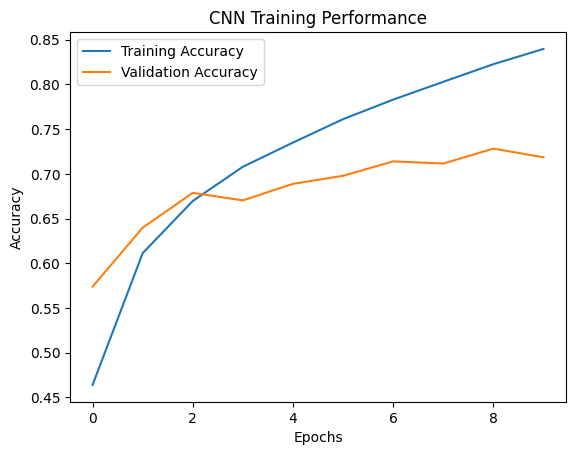

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values (0 to 255 → 0 to 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define CNN architecture
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training Performance')
plt.show()


***Practical No. – 6 Sequence Modelling ***

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0878 - val_loss: 0.0023
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014 - val_loss: 2.3720e-04
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1759e-04 - val_loss: 1.6392e-04
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4181e-04 - val_loss: 8.9356e-05
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.1357e-05 - val_loss: 5.4683e-05
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7308e-05 - val_loss: 3.6743e-05
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.5314e-05 - val_loss: 2.9832e-05
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2088e-05 - val_loss: 1.6573e-05
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6265e-05 - val_loss: 1.2556e-05
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1434e-05 - val_loss: 1.1248e-05
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1151e-05 - val_loss: 1.3241e-05
Epoch 12

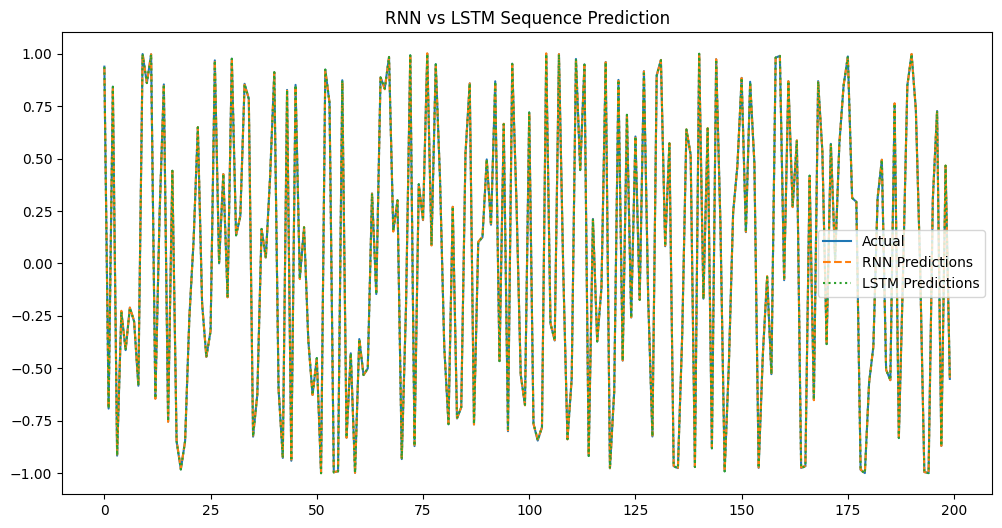

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
import matplotlib.pyplot as plt

# Generate a sine wave dataset
def generate_sine_wave(seq_length, num_samples):
    X, y = [], []
    for _ in range(num_samples):
        start = np.random.rand() * 2 * np.pi
        seq = np.sin(np.linspace(start, start + seq_length * 0.1, seq_length))
        X.append(seq)
        y.append(np.sin(start + seq_length * 0.1))  # Predict next value
    return np.array(X), np.array(y)

# Prepare dataset
seq_length = 20
num_samples = 1000
X, y = generate_sine_wave(seq_length, num_samples)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for RNN input

# Split into training and testing sets
split = int(0.8 * num_samples)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build and train RNN model
def build_rnn_model():
    model = Sequential([
        SimpleRNN(50, activation='tanh', return_sequences=False, input_shape=(seq_length, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Build and train LSTM model
def build_lstm_model():
    model = Sequential([
        LSTM(50, activation='tanh', return_sequences=False, input_shape=(seq_length, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Train and evaluate RNN model
rnn_model = build_rnn_model()
rnn_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1, validation_data=(X_test, y_test))
rnn_preds = rnn_model.predict(X_test)

# Train and evaluate LSTM model
lstm_model = build_lstm_model()
lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1, validation_data=(X_test, y_test))
lstm_preds = lstm_model.predict(X_test)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(rnn_preds, label='RNN Predictions', linestyle='dashed')
plt.plot(lstm_preds, label='LSTM Predictions', linestyle='dotted')
plt.legend()
plt.title("RNN vs LSTM Sequence Prediction")
plt.show()


**Practical No. - 7**
**Application**

**Aim: Explore applications in speech recognition and natural language processing.**


In [ ]:
import nltk  # Importing the Natural Language Toolkit (NLTK) for text processing
from nltk.tokenize import word_tokenize, sent_tokenize  # Importing tokenization functions
from textblob import TextBlob  # Importing TextBlob for sentiment analysis

# Download 'punkt' resource if not already present
nltk.download('punkt')
nltk.download('punkt_tab')


def get_text_input():
    """
    Function to get text input from the user.
    Instead of using speech recognition, it takes direct text input.
    """
    text = input("Enter your text: ")  # Prompt user for input
    return text  # Return the entered text


def process_text(text):
    """
    Function to tokenize the given text into sentences and words.
    """
    # Sentence Tokenization
    print("\nTokenized Sentences:")
    sentences = sent_tokenize(text, language="english")  # Splitting text into sentences
    for i, sent in enumerate(sentences, 1):  # Iterating over sentences
        print(f"Sentence {i}: {sent}")  # Displaying each sentence

    # Word Tokenization
    print("\nTokenized Words:")
    words = word_tokenize(text, language="english")  # Splitting text into words
    print(words)  # Displaying list of words


def sentiment_analysis(text):
    """
    Function to analyze sentiment of the text.
    Uses TextBlob to calculate sentiment polarity.
    """
    blob = TextBlob(text)  # Creating a TextBlob object for sentiment analysis
    sentiment = blob.sentiment.polarity  # Extracting sentiment polarity score (-1 to 1)

    # Classifying sentiment based on polarity score
    if sentiment > 0:
        print("\nSentiment: Positive 😊")  # Positive sentiment if polarity > 0
    elif sentiment < 0:
        print("\nSentiment: Negative 😞")  # Negative sentiment if polarity < 0
    else:
        print("\nSentiment: Neutral 😐")  # Neutral sentiment if polarity == 0


# Main execution block
if __name__ == "__main__":
    user_text = get_text_input()  # Get input text from user
    if user_text:  # Check if input is not empty
        process_text(user_text)  # Tokenize text into sentences and words
        sentiment_analysis(user_text)  # Perform sentiment analysis

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Enter your text: my name is mudra

Tokenized Sentences:
Sentence 1: my name is mudra

Tokenized Words:
['my', 'name', 'is', 'mudra']

Sentiment: Neutral 😐


**Practical No.- 8**
**Linear Factor Models**

**Aim: 1. Implement probabilistic PCA and factor analysis algorithms.**

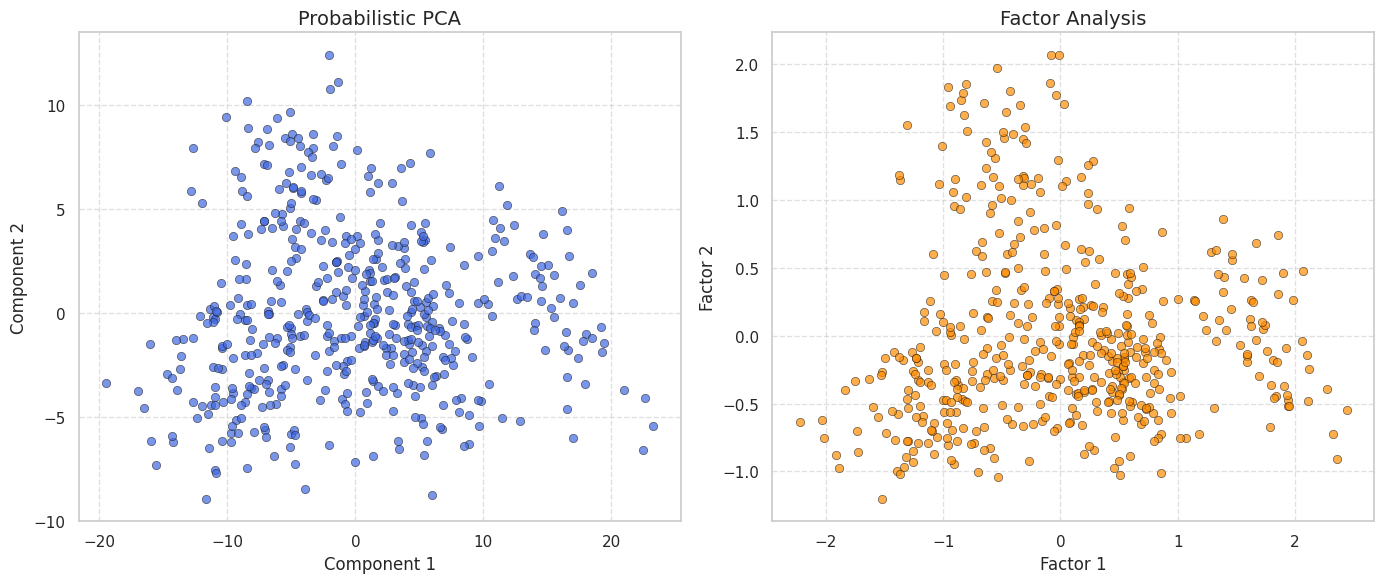

Explained Variance Ratio (PPCA): [0.59261945 0.14064393]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.datasets import make_multilabel_classification

# Generate synthetic data
np.random.seed(42)
n_samples = 500
n_features = 5
X, _ = make_multilabel_classification(n_samples=n_samples, n_features=n_features, n_classes=2, random_state=42)

# Apply Probabilistic PCA
ppca = PCA(n_components=2, svd_solver='full')  # PPCA with full SVD solver
X_ppca = ppca.fit_transform(X)

# Apply Factor Analysis
fa = FactorAnalysis(n_components=2, random_state=42)
X_fa = fa.fit_transform(X)

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Probabilistic PCA
sns.scatterplot(x=X_ppca[:, 0], y=X_ppca[:, 1], alpha=0.7, edgecolor='k', color='royalblue', ax=axes[0])
axes[0].set_title('Probabilistic PCA', fontsize=14)
axes[0].set_xlabel('Component 1', fontsize=12)
axes[0].set_ylabel('Component 2', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot Factor Analysis
sns.scatterplot(x=X_fa[:, 0], y=X_fa[:, 1], alpha=0.7, edgecolor='k', color='darkorange', ax=axes[1])
axes[1].set_title('Factor Analysis', fontsize=14)
axes[1].set_xlabel('Factor 1', fontsize=12)
axes[1].set_ylabel('Factor 2', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Print explained variance for PPCA
print("Explained Variance Ratio (PPCA):", ppca.explained_variance_ratio_)

**Practical No.- 9**

**Autoencoder**

**Aim:  Implement autoencoders and explore their applications in data compression and denoising**


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.3856 - val_loss: 0.1891
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1788 - val_loss: 0.1514
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1479 - val_loss: 0.1330
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1310 - val_loss: 0.1205
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1195 - val_loss: 0.1117
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1116 - val_loss: 0.1056
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1057 - val_loss: 0.1015
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1023 - val_loss: 0.0986
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0995 - val_loss: 0.0966
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0975 - val_loss: 0.0951
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0962 - val_loss: 0.0942
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


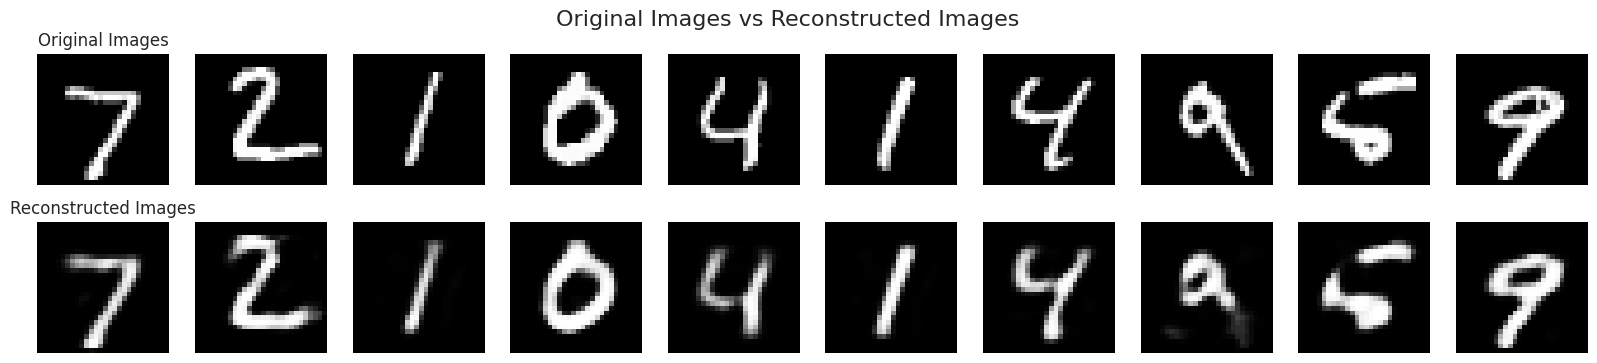

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0928 - val_loss: 0.5861
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0926 - val_loss: 0.5921
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0925 - val_loss: 0.5913
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0926 - val_loss: 0.5934
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0927 - val_loss: 0.5936
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0923 - val_loss: 0.6049
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0926 - val_loss: 0.6026
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0925 - val_loss: 0.6073
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0923 - val_loss: 0.6190
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0925 - val_loss: 0.6255
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


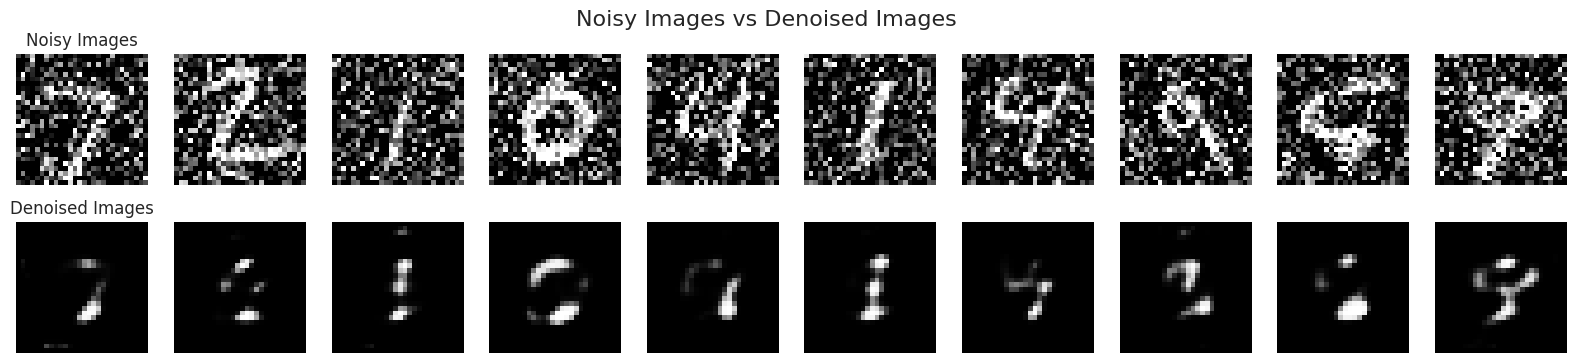

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images for autoencoder
x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))

# Autoencoder architecture
encoding_dim = 32  # Dimension of encoded representation

# Encoder
input_image = Input(shape=(784,))
encoded_layer = Dense(encoding_dim, activation='relu')(input_image)

# Decoder
decoded_layer = Dense(784, activation='sigmoid')(encoded_layer)

# Autoencoder model
autoencoder = Model(input_image, decoded_layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode test images
reconstructed_images = autoencoder.predict(x_test)

# Reshape to 28x28 images
original_images = x_test.reshape(-1, 28, 28)
reconstructed_images = reconstructed_images.reshape(-1, 28, 28)


# Plot original and reconstructed images
def plot_images(original, reconstructed, title_original, title_reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    plt.suptitle(f"{title_original} vs {title_reconstructed}", fontsize=16)

    for i in range(n):
        # Original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i], cmap='gray')
        if i == 0:
            ax.set_title(title_original, fontsize=12)
        plt.axis('off')

        # Reconstructed
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i], cmap='gray')
        if i == 0:
            ax.set_title(title_reconstructed, fontsize=12)
        plt.axis('off')

    plt.show()


plot_images(original_images, reconstructed_images, "Original Images", "Reconstructed Images")

# Add noise to test images
noise_factor = 0.5
noisy_images = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
noisy_images = np.clip(noisy_images, 0., 1.)

# Train autoencoder on noisy images
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(noisy_images, x_test))

# Denoise images
denoised_images = autoencoder.predict(noisy_images)
denoised_images = denoised_images.reshape(-1, 28, 28)

# Plot noisy and denoised images
plot_images(noisy_images.reshape(-1, 28, 28), denoised_images, "Noisy Images", "Denoised Images")


**Practical No. - 10**
**Approximate Inference**
**Aim: Implement expectation-maximization (EM) algorithm for clustering tasks.**

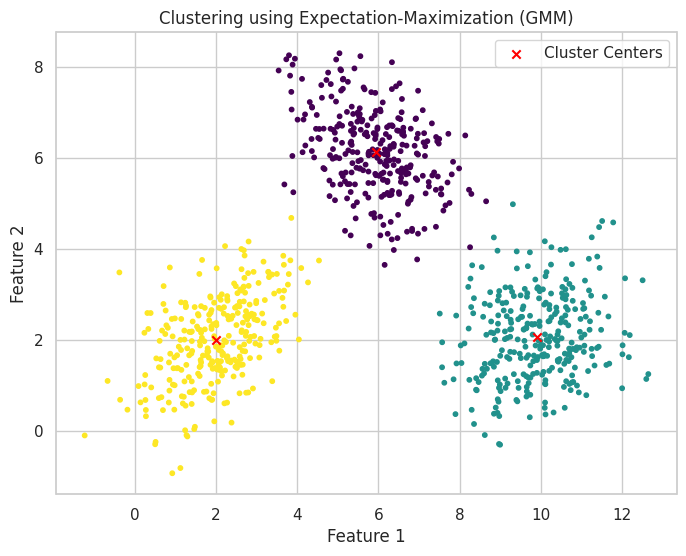

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generate synthetic data
np.random.seed(42)
n_samples = 300

# Create data from three Gaussian distributions
mean1, cov1 = [2, 2], [[1, 0.5], [0.5, 1]]
mean2, cov2 = [6, 6], [[1, -0.5], [-0.5, 1]]
mean3, cov3 = [10, 2], [[1, 0.3], [0.3, 1]]

data1 = np.random.multivariate_normal(mean1, cov1, n_samples)
data2 = np.random.multivariate_normal(mean2, cov2, n_samples)
data3 = np.random.multivariate_normal(mean3, cov3, n_samples)

# Combine into one dataset
data = np.vstack((data1, data2, data3))

# Fit Gaussian Mixture Model using Expectation-Maximization
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(data)

# Get cluster labels
labels = gmm.predict(data)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=10)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='x', label='Cluster Centers')
plt.title("Clustering using Expectation-Maximization (GMM)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


**Practical No. - 11**
**Deep Generative Models**

**Aim: Implement Boltzmann machines and explore their applications in modelling complex data distributions.**

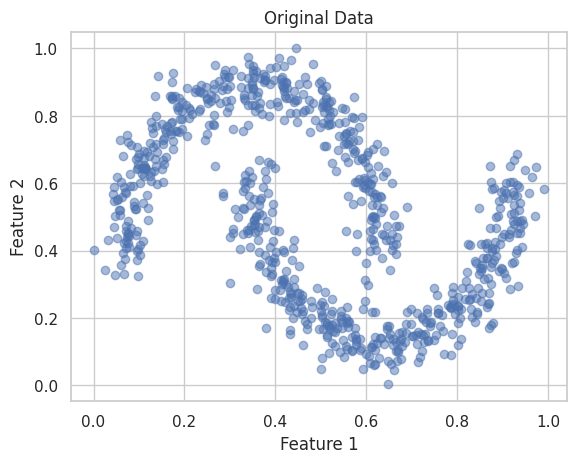

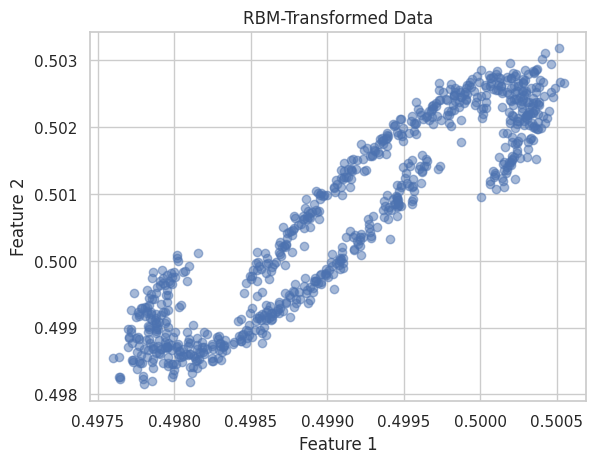

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons


def generate_synthetic_data():
    """Generates a synthetic dataset using the make_moons function."""
    # Create a 2D dataset with two interleaving half circles (moon shapes)
    X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

    # Normalize the data to bring all values into the range [0, 1]
    X = MinMaxScaler().fit_transform(X)

    # Split the dataset into training and testing sets (80% train, 20% test)
    return train_test_split(X, y, test_size=0.2, random_state=42)


def train_rbm(X_train, n_components=2, learning_rate=0.01, n_iter=10):
    """Trains a Restricted Boltzmann Machine (RBM)."""
    # Initialize the RBM with specified components (hidden units), learning rate, and iterations
    rbm = BernoulliRBM(n_components=n_components, learning_rate=learning_rate, n_iter=n_iter, random_state=42)

    # Train the RBM on the training dataset
    rbm.fit(X_train)

    return rbm


def visualize_data(X, title="Data Visualization"):
    """Visualizes 2D data points."""
    # Scatter plot for data points
    plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
    plt.title(title)  # Set plot title
    plt.xlabel("Feature 1")  # Label x-axis
    plt.ylabel("Feature 2")  # Label y-axis
    plt.show()  # Display the plot


def main():
    # Generate synthetic dataset
    X_train, X_test, y_train, y_test = generate_synthetic_data()

    # Visualize the original dataset before applying RBM
    visualize_data(X_train, title="Original Data")

    # Train the RBM model
    rbm = train_rbm(X_train)

    # Transform the data using the trained RBM (feature extraction)
    transformed_data = rbm.transform(X_train)

    # Visualize the transformed dataset after applying RBM
    visualize_data(transformed_data, title="RBM-Transformed Data")


# Execute the main function when the script is run
if __name__ == "__main__":
    main()
